Epoch 1/10
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 59.7949 - val_loss: 23.4688
Epoch 2/10
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 23.0486 - val_loss: 22.6247
Epoch 3/10
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22.6885 - val_loss: 22.5392
Epoch 4/10
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 22.5538 - val_loss: 22.4897
Epoch 5/10
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22.5170 - val_loss: 22.3994
Epoch 6/10
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22.3186 - val_loss: 22.3547
Epoch 7/10
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.2372 - val_loss: 22.2248
Epoch 8/10
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 22.1118 - val_loss: 22.4924
Epoch 9/10
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 22.2991 - val_loss: 22.2569
Epoch 10/10
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 22.0943 - val_loss: 22.1587
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Absolute Error on Test Set: 21.93


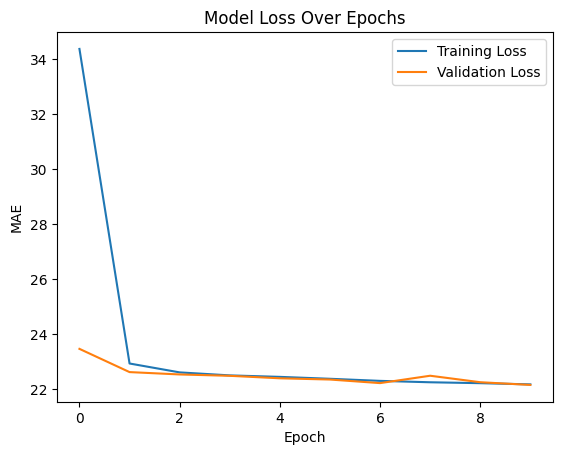

Output()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import ipywidgets as widgets
from IPython.display import display

ipl = pd.read_csv("ipl_data.csv")

df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
                      'mid', 'striker', 'non-striker'], axis=1)


encoders = {}
for col in ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


X = df.drop('total', axis=1)
y = df['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32,
                    verbose=1)

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae:.2f}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

def predict_runs(venue, bat_team, bowl_team, batsman, bowler):
    input_df = pd.DataFrame([[venue, bat_team, bowl_team, batsman, bowler]],
                            columns=['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler'])
    for col in ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']:
        input_df[col] = encoders[col].transform(input_df[col])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    print(f"Predicted Score: {int(prediction[0][0])}")

venue_widget = widgets.Dropdown(options=encoders['venue'].classes_, description='Venue:')
bat_team_widget = widgets.Dropdown(options=encoders['bat_team'].classes_, description='Batting Team:')
bowl_team_widget = widgets.Dropdown(options=encoders['bowl_team'].classes_, description='Bowling Team:')
batsman_widget = widgets.Dropdown(options=encoders['batsman'].classes_, description='Batsman:')
bowler_widget = widgets.Dropdown(options=encoders['bowler'].classes_, description='Bowler:')

ui = widgets.VBox([
    venue_widget,
    bat_team_widget,
    bowl_team_widget,
    batsman_widget,
    bowler_widget
])

out = widgets.interactive_output(predict_runs, {
    'venue': venue_widget,
    'bat_team': bat_team_widget,
    'bowl_team': bowl_team_widget,
    'batsman': batsman_widget,
    'bowler': bowler_widget
})

display(ui, out)